In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import pandas as pd
from sklearn.neighbors import KernelDensity
import seaborn as sns
import warnings
from pylab import *
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')

In [2]:
PATH = '<PATH/TO/DIR>/WAVE/Linear_vs_planar/Lamel_vs_rings/'

In [3]:
def gauss(x,mu,sigma,A,B,):
    return A*exp(-(x-mu)**2/2/sigma**2)+B

def bimodal(x,mu1,sigma1,A1,B1,mu2,sigma2,A2,B2):
    return gauss(x,mu1,sigma1,A1,B1)+gauss(x,mu2,sigma2,A2,B2)

# Fitting linescans of WAVE complex nanorings

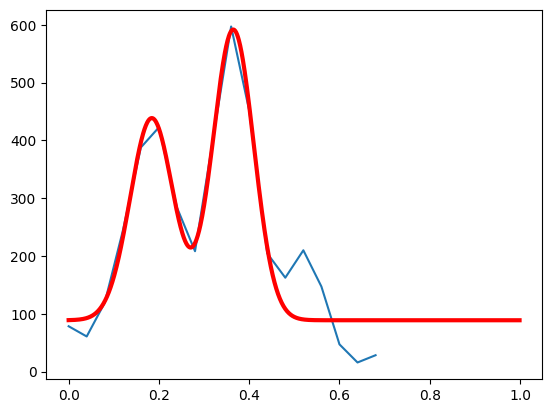

In [6]:
df=pd.read_csv(PATH+'linescans/rings_hist/231111_3_4/231111_latb_3_4_20.csv')
x = df['Distance_(microns)']
y = df['Gray_Value']
expected=(0.1,.1,300,-6000,0.3,.1,300,6000)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,y)
plot(np.arange(0,1,0.001),bimodal(np.arange(0,1,0.001),*params),color='red',lw=3,label='model')

In [7]:
amp = (params[2]+params[6])/2
amp

425.9889551761756

In [10]:
# rings_amp = []

In [11]:
rings_amp.append(amp)

In [12]:
np.mean(rings_amp)

425.9889551761756

In [ ]:
with open(PATH + 'linescans/rings_hist/231111_3_4/amp.csv', 'w') as f:
    for line in rings_amp:
        f.write(f"{line}\n")

# Fitting linescans of lamellipodia

[2.12022944e-01 3.16412090e-02 3.85180008e+02 7.76058619e+01] 
 [4.84293305e-03 5.38615019e-03 5.31045723e+01 1.50913131e+01]


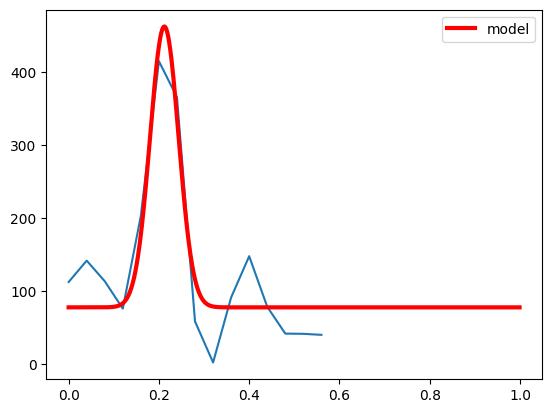

In [13]:
data=pd.read_csv(PATH + 'linescans/lamel_hist/231106_1_2/231106_fmlp_1_2_23.csv')

x = data['Distance_(microns)']
y = data['Gray_Value']
expected=(0.3,.1,600,100)
params,cov=curve_fit(gauss,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,y)
plot(np.arange(0,1,0.001),gauss(np.arange(0,1,0.001),*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma)  

In [15]:
# lamel_amp = []

In [16]:
lamel_amp.append(params[2])

In [17]:
np.mean(lamel_amp)

385.18000787746615

In [ ]:
with open(PATH + 'linescans/lamel_hist/231106_1_2/amp.csv', 'w') as f:
    for line in lamel_amp:
        f.write(f"{line}\n")

# Generate plot

In [27]:
lamel_csv_files = []
rings_csv_files = []
for path, subdirs, files in os.walk(PATH+'linescans/lamel_hist/'):
    for name in files:
        if name.endswith("amp.csv"):
            lamel_csv_files.append(os.path.join(path, name))
            rings_csv_files.append(os.path.join(path[0:76]+'rings'+path[81:],name))
lamel_amp = []
rings_amp = []
for csv_file in lamel_csv_files:
    df = pd.read_csv(csv_file,header= None)
    lamel_amp.append(df.mean(axis = 0).values[0])
for csv_file in rings_csv_files:
    df = pd.read_csv(csv_file,header= None)
    rings_amp.append(df.mean(axis = 0).values[0])

In [30]:
amps = pd.DataFrame(columns = ['Lamellipod','Nanorings'] )


In [31]:
amps['Lamellipod'] = lamel_amp
amps['Nanorings'] = rings_amp

In [32]:
amps_normalized = pd.DataFrame(columns = ['Lamellipod','Nanorings'])

In [33]:
amps_normalized['Nanorings'] = amps.Nanorings/amps.Lamellipod
amps_normalized['Lamellipod'] = amps.Lamellipod/amps.Lamellipod

In [34]:
stats.ttest_rel(amps_normalized['Lamellipod'],amps_normalized['Nanorings'])

TtestResult(statistic=-0.47423338107408386, pvalue=0.6383651013698542, df=34)

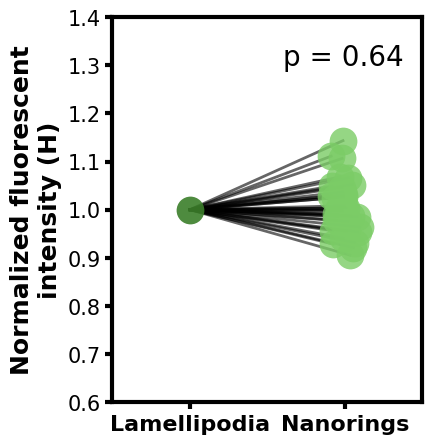

In [36]:
f, ax = plt.subplots(figsize =(4,5))
plt.ylim(0.6,1.4)
plt.ylabel('Normalized fluorescent\nintensity (H)',size = 18,fontweight = 'bold')
plt.xticks(ticks = [0,1],labels = ['Lamellipodia','Nanorings'],size = 16,fontweight = 'bold')
plt.xlim(-0.4,1.4)
pal = ['#3b7e2a',"#7bcc66"]
sns.stripplot(y=amps_normalized["Lamellipod"][0:1],size =20, ax=ax,color=pal[0],alpha = 0.9)
sns.stripplot(y=amps_normalized["Nanorings"],x=[1] * len(amps_normalized), size =20, ax=ax,color=pal[1],alpha = 0.8)

# Now connect the dots
# Find idx0 and idx1 by inspecting the elements return from ax.get_children()
# ... or find a way to automate it
idx0 = 0
idx1 = 1
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

set1 = amps_normalized['Lamellipod']
set2 = amps_normalized['Nanorings']
# before plotting, we need to sort so that the data points
# correspond to each other as they did in "set1" and "set2"
sort_idxs1 = np.argsort(set1)
sort_idxs2 = np.argsort(set2)

# revert "ascending sort" through sort_idxs2.argsort(),
# and then sort into order corresponding with set1
locs2_sorted = locs2[sort_idxs2.argsort()][sort_idxs1]

for i in range(locs2.shape[0]):
    x = [locs1[0, 0], locs2_sorted[i, 0]]
    y = [locs1[0, 1], locs2_sorted[i, 1]]
    ax.plot(x, y, color="black", alpha=0.6,lw = 2)
# y, h, col = 3, 0.3, 'k'
# plt.text(0.2, 4, 'p = 6.3e-6', ha='center', va='bottom', color=col,size = 20)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)

# increase tick width
ax.tick_params(width=3,size =5)
plt.yticks(fontsize = 15)
plt.text(0.6,1.3,'p = 0.64',size = 20)
plt.savefig(PATH + 'Fig2H_lamel_vs_rings.png',dpi = 300,bbox_inches = 'tight')